# Sampling Methods: Accept/reject for bounded distributions

#### 08/22, written by Alice Cicirello (alicecicirello8@gmail.com) 

Bounded example: based on the example from https://cosmiccoding.com.au/tutorials/rejection_sampling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})

## Bounded support: simple function example

$$
 p(x) =1.2 - x^4
$$

with 0 $\leq x \leq $ 1  - this function integrates to 1



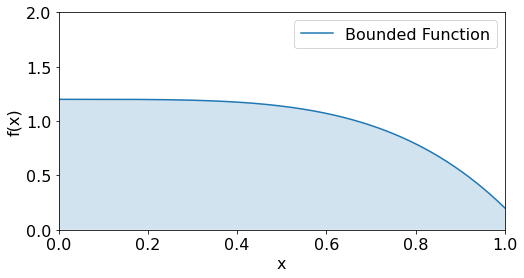

In [2]:
def simple_function(x):
    f = 1.2 - x ** 4
    return f

n_samples=5000
xs = np.linspace(0, 1, n_samples)
ys = simple_function(xs)

plt.figure(figsize=(8, 4))
plt.plot(xs, ys, label="Bounded Function") 
plt.fill_between(xs, ys, 0, alpha=0.2)
plt.xlim(0, 1), plt.ylim(0, 2), plt.xlabel("x"), plt.ylabel("f(x)"), plt.legend();

### Step 1: choose $M$ with a margin value $\alpha$

In [3]:
alphav=0.2 # margin value

M=(1+alphav)* max(simple_function(xs))  # constant M - defining the upper bound 
print("Upper bound is:", M)

Upper bound is: 1.44


### Step 2: Generate samples from 2 uniform distributions with
 0 $\leq x \leq $ 1
 
 0 $\leq f(x) \leq $ M
 
### Step 3: Accept sample if

 u < f(x)


In [4]:
# function for generating the samples within the rectangle + acceptance rule
def sample(function2, xmin, xmax, ymax):
    while True:
        x = np.random.uniform(low=xmin, high=xmax)
        u = np.random.uniform(low=0, high=ymax)
        if u < function2(x):
            return x
        
        # note: this is not the most efficient implementation - by using batches the efficiency will improve

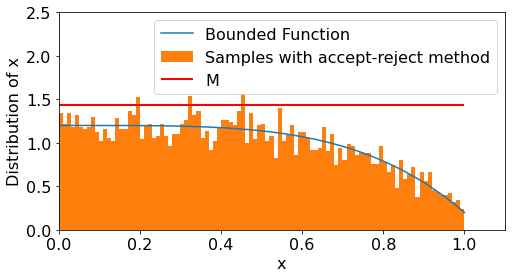

In [5]:
xmin=0
xmax=1

samps = [sample(simple_function, xmin, xmax, M)  for i in range(n_samples)]

plt.figure(figsize=(8, 4))
plt.plot(xs, ys, label="Bounded Function")
plt.hlines(M, xmin, xmax, linewidth=2, color='r', label="M")
plt.hist(samps, bins=100, density=True, label='Samples with accept-reject method')
plt.xlim(0, 1.1), plt.ylim(0, 2.5), plt.xlabel("x"), plt.ylabel("Distribution of x"), plt.legend();

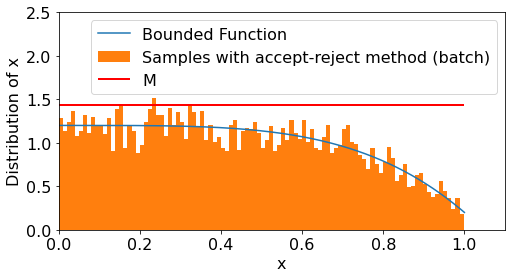

In [6]:
# more efficient implementation - using batches
# batch: 1000 - using 1000 proposal at once

def batch_sample(function2, num_samples, xmin, xmax, ymax, batch=1000):
    samples = []
    while len(samples) < num_samples:
        x = np.random.uniform(low=xmin, high=xmax, size=batch)
        y = np.random.uniform(low=0, high=ymax, size=batch)
        samples += x[y < function2(x)].tolist()
    return samples

samps2 = batch_sample(simple_function, n_samples, xmin, xmax, M)

plt.figure(figsize=(8, 4))
plt.plot(xs, ys, label="Bounded Function")
plt.hlines(M, xmin, xmax, linewidth=2, color='r', label="M")
plt.hist(samps2, bins=100, density=True, label='Samples with accept-reject method (batch)')
plt.xlim(0, 1.1), plt.ylim(0, 2.5), plt.xlabel("x"), plt.ylabel("Distribution of x"), plt.legend();

In [7]:
def batch_sample_2(function2, num_samples,  xmin, xmax, ymax,  batch=1000):
    x = np.random.uniform(low=xmin, high=xmax, size=batch)
    y = np.random.uniform(low=0, high=ymax, size=batch)
    passed = (y < function2(x)).astype(int) # generate an array of 0 (not_pass) and 1 (pass)
    return x, y, passed

Efficiency is only 69.0%


69.0

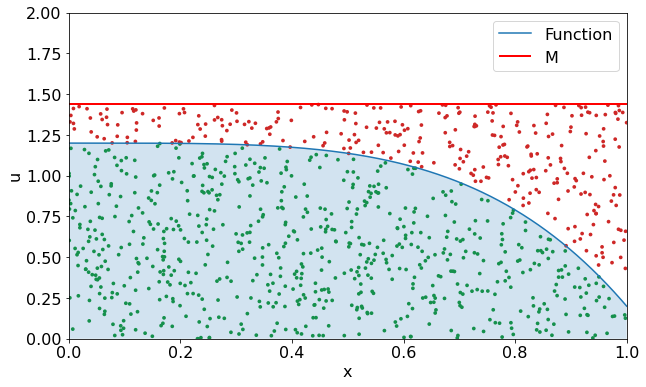

In [8]:
x, y, passed = batch_sample_2(simple_function, n_samples, xmin, xmax, M)

plt.figure(figsize=(10, 6))
plt.fill_between(xs, ys, 0, alpha=0.2)
plt.hlines(M, xmin, xmax, linewidth=2, color='r', label="M")
plt.scatter(x, y, c=passed, cmap="RdYlGn", vmin=-0.1, vmax=1.1, lw=2, s=3)
plt.plot(xs, ys, label="Function")
plt.xlim(0, 1), plt.ylim(0, 2.0), plt.xlabel("x"), plt.ylabel("u"), plt.legend();


print(f"Efficiency is only {passed.mean() * 100:0.1f}%")

(np.count_nonzero(passed)/passed.size)*100 
# alternative approach to obtain the number of accepted samples over the total number of samples generated (efficiency)


## Problems with unbounded distributions

$$
 p(x) = e^{- \pi x^2}
$$

with $ - \infty \leq x \leq  \infty $ - this probability density function integrates to 1


Upper bound is: 0.999996857155271
Efficiency is only 11.5%


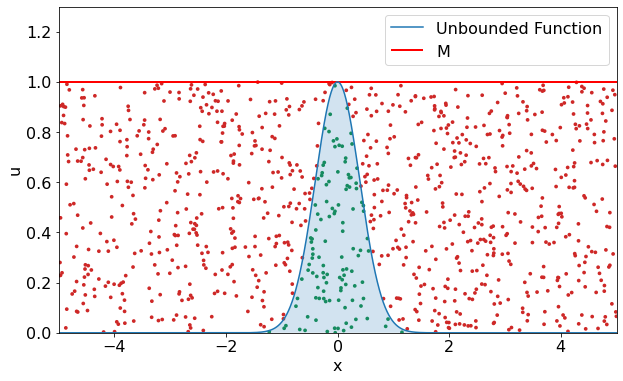

In [16]:
def unbounded_func(x):
    return np.exp(-np.pi * x**2)

# note that now the xmin and xmax are -inf +inf. Only -5 +5 are going to be considered

xmin2=- 5
xmax2=5
xs2 = np.linspace(xmin2, xmax2, n_samples)
ys2 = unbounded_func(xs2)

alphav2=0 # margin value on M


M2=(1+alphav2)* max(unbounded_func(xs2))  # constant M - defining the upper bound 
print("Upper bound is:", M2)



x2, y2, passed2 = batch_sample_2(unbounded_func, n_samples, xmin2, xmax2, M2)


plt.figure(figsize=(10, 6))
plt.hlines(M2, xmin2, xmax2, linewidth=2, color='r', label="M")
plt.scatter(x2, y2, c=passed2, cmap="RdYlGn", vmin=-0.1, vmax=1.1, lw=2, s=3)
plt.plot(xs2, ys2, label="Unbounded Function") 
plt.fill_between(xs2, ys2, 0, alpha=0.2)
plt.xlim(xmin2, xmax2), plt.ylim(0, M2+0.3), plt.xlabel("x"), plt.ylabel("u"), plt.legend();

print(f"Efficiency is only {passed2.mean() * 100:0.1f}%")

#### The algorithm used for bounded distributions cannot be efficiently applied to the unbounded cases, since many samples will be rejected!

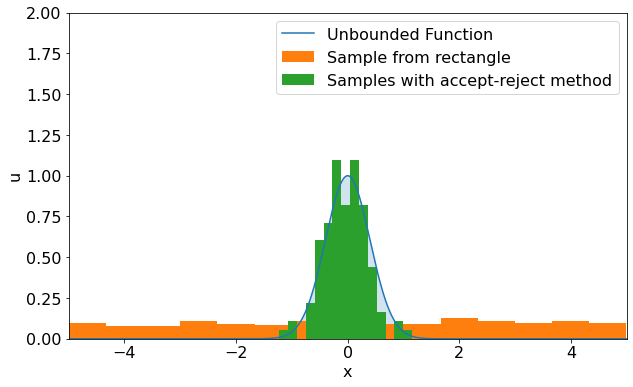

In [18]:
z=x2[np.nonzero(passed2)]   # samples generated that have been accepted
 

plt.figure(figsize=(10, 6))
plt.plot(xs2, ys2, label="Unbounded Function") 
plt.fill_between(xs2, ys2, 0, alpha=0.2)
plt.hist(x2, bins=15, density=True, label='Sample from rectangle')
plt.hist(z, bins=15, density=True, label='Samples with accept-reject method')

plt.xlim(xmin2, xmax2), plt.ylim(0, 2), plt.xlabel("x"), plt.ylabel("u"), plt.legend();